In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import json

In [2]:
df_lst_seattle = pd.read_csv('.\\AirBnb_Seattle\\listings.csv')
df_rvs_seattle = pd.read_csv('.\\AirBnb_Seattle\\reviews.csv')
df_cl_seattle = pd.read_csv('.\\AirBnb_Seattle\\calendar.csv')

In [3]:
df_lst_boston = pd.read_csv('.\\AirBnb_Boston\\listings.csv')
df_rvs_boston = pd.read_csv('.\\AirBnb_Boston\\reviews.csv')
df_cl_boston = pd.read_csv('.\\AirBnb_Boston\\calendar.csv')

In [4]:
#Variables related to price in dataset (Target variable)
print([i for i in list(df_lst_seattle.columns) if 'price' in i])
#df_lst_seattle['price'] = df_lst_seattle['price'].str.replace('$', '').apply(lambda x: x.replace(',','')).astype(float)

['price', 'weekly_price', 'monthly_price']


In [10]:
df_lst_seattle[['price', 'weekly_price', 'monthly_price']].isnull().sum()

price               0
weekly_price     1809
monthly_price    2301
dtype: int64

In [21]:
#Transforming price from string to float
df_lst_seattle['price'] = df_lst_seattle['price'].apply(lambda x: x.replace('$', '').replace(',','')).astype(float)

In [24]:
df_lst_seattle.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [42]:
df_selected_features = df_lst_seattle[['city', 'room_type', 'property_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'latitude', 'longitude',
                'amenities', 'guests_included', 'minimum_nights',
                'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value'
                , 'number_of_reviews', 'price']]

In [19]:
df_lst_seattle['weekly_price'].fillna('0')

0               0
1       $1,000.00
2               0
3         $650.00
4               0
          ...    
3813            0
3814            0
3815      $450.00
3816            0
3817            0
Name: weekly_price, Length: 3818, dtype: object

In [16]:
df_lst_seattle['amenities'][0]

'{TV,"Cable TV",Internet,"Wireless Internet","Air Conditioning",Kitchen,Heating,"Family/Kid Friendly",Washer,Dryer}'

In [8]:
#Amenities in the listings
df_lst_seattle['amenities'] = df_lst_seattle['amenities'].apply(lambda x: x.replace('{', '').replace('}','').replace('"', ''))
amenities_lst = list(np.unique(np.concatenate([i.split(',') for i in df_lst_seattle['amenities']])))

amenities_dict = {}

for i in amenities_lst:
    #amenities_dict[i] = 0
    count = 0
    for j in df_lst_seattle['amenities']:
        if i in j:
            #Se na coluna procurada existem valores nos campos de pesquisa
            #new_df[val] += int(df[col2][idx])
            count+=1
    amenities_dict[i] = count
    
    
#print(amenities_dict.items())

amenities_df = pd.DataFrame(pd.Series(amenities_dict))

amenities_df.sort_values(0, ascending = False)[1:]
#maybe it can be a variable in my final dataFrame

,0
Internet,3692
Wireless Internet,3667
Heating,3627
Kitchen,3423
Smoke Detector,3281
Essentials,3237
Dryer,3114
Washer,2992
TV,2741
Shampoo,2670


In [79]:
def money_to_float(x):
    if (x == None) or (x == 'nan') or type(x) == float:
        x = '$0'
    x = x.replace('$', '')
    x = x.replace(',', '')
    return float(x)

In [13]:
df_lst_seattle.isnull().sum()[(df_lst_seattle.isnull().sum()/ df_lst_seattle.shape[0]) > .05].sort_values(ascending= False)/ df_lst_seattle.shape[0]

license                        1.000000
square_feet                    0.974594
monthly_price                  0.602672
security_deposit               0.511262
weekly_price                   0.473808
notes                          0.420639
neighborhood_overview          0.270299
cleaning_fee                   0.269775
transit                        0.244631
host_about                     0.224987
host_acceptance_rate           0.202462
review_scores_accuracy         0.172342
review_scores_checkin          0.172342
review_scores_value            0.171818
review_scores_location         0.171556
review_scores_cleanliness      0.171032
review_scores_communication    0.170508
review_scores_rating           0.169460
reviews_per_month              0.164222
first_review                   0.164222
last_review                    0.164222
space                          0.149031
host_response_rate             0.136983
host_response_time             0.136983
neighbourhood                  0.108958


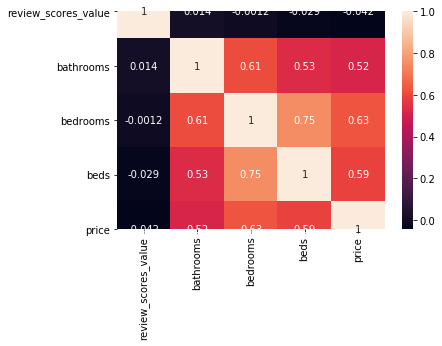

In [53]:
sns.heatmap(df_lst_seattle[['review_scores_value', 'amenities', 'neighbourhood', 'neighbourhood_cleansed', 'cleaning_fee', 'bathrooms', 'bedrooms', 'beds', 'price']].corr(), annot = True)

In [56]:
df_lst_seattle.select_dtypes(include='object').columns

Index(['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'amenities', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people',
       'calendar_updated', 'has_availability', 'calendar_last_scraped',
       

In [81]:
df_lst_seattle['cleaning_fee'] = df_lst_seattle['cleaning_fee'].apply(lambda x : money_to_float(x))

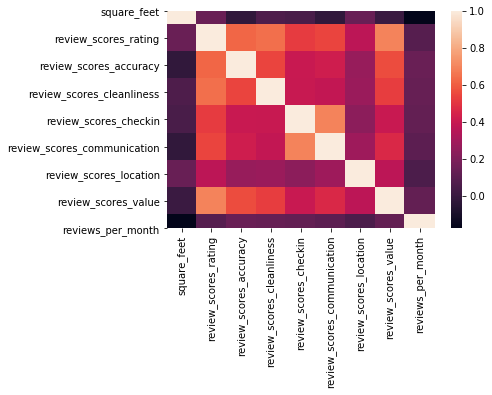

In [42]:
sns.heatmap(df_lst_seattle[df_lst_seattle.columns[df_lst_seattle.isnull().sum()/df_lst_seattle.shape[0] > .05]].corr())

In [37]:
df_lst_seattle.dropna(how='all', axis='columns', inplace= True)


df_lst_seattle.dropna(subset=['price'], axis=0, inplace= True)

In [40]:
df_lst_seattle.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [ ]:
!pip install jupyter_contrib_nbextensions && jupyter contrib nbextension install

In [53]:
df_lst_seattle['price'].describe()

df_lst_seattle.iloc[np.argmin(df_lst_seattle['price'])]

id                                                               10310373
listing_url                         https://www.airbnb.com/rooms/10310373
scrape_id                                                  20160104002432
last_scraped                                                   2016-01-04
name                                        Cozy, cute, Queen Anne living
                                                    ...                  
cancellation_policy                                              flexible
require_guest_profile_picture                                           f
require_guest_phone_verification                                        f
calculated_host_listings_count                                          1
reviews_per_month                                                     NaN
Name: 53, Length: 92, dtype: object

In [119]:
df_rvs_seattle.groupby('listing_id')['comments'].apply(lambda x: list(x))

listing_id
4291        [We had a great stay in Seattle, great locatio...
5682        [Very sweet outgoing host with a nice family a...
6606        [The Urban Cottage is comfortable, beautiful, ...
7369        [I was staying with Shireen for a weekend and ...
9419        [If you love art, animals, and yoga, this is t...
                                  ...                        
9995551     [Awesome host! The cottage is nice and clean a...
10012724    [This is a prime location of walking distance ...
10020221    [Awesome room! Thanks for the kindness and let...
10118341    [My mom and I came for a 4 day trip and had a ...
10248139    [I was able to book on the last minute and wor...
Name: comments, Length: 3191, dtype: object

In [ ]:
#Date x Booking prices

In [ ]:
#features that impact in the pricing

In [ ]:
#location x pricing

In [ ]:
#review and rating x price 

In [ ]:
#Price x amenities and features x location